# Завдання 4

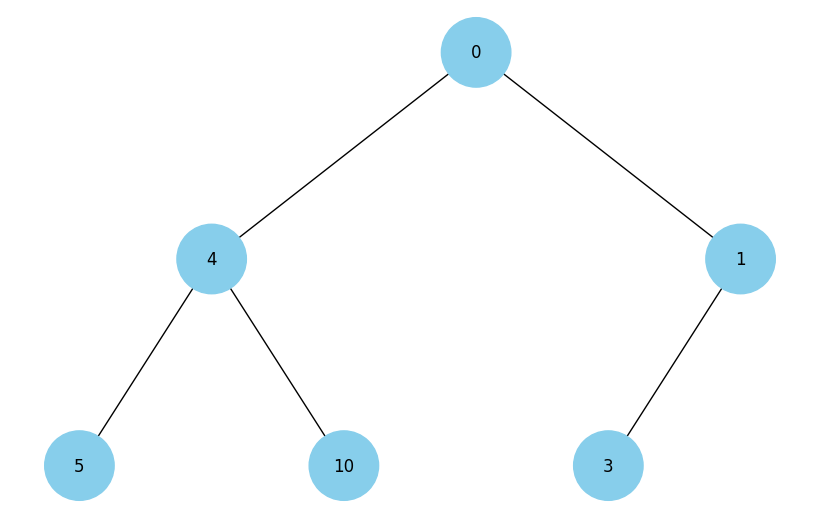

In [35]:
import uuid

import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color  # Додатковий аргумент для зберігання кольору вузла
        self.id = str(uuid.uuid4())  # Унікальний ідентифікатор для кожного вузла

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)  # Використання id та збереження значення вузла
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}  # Використовуйте значення вузла для міток

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

# Створення дерева
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

# Відображення дерева
draw_tree(root)

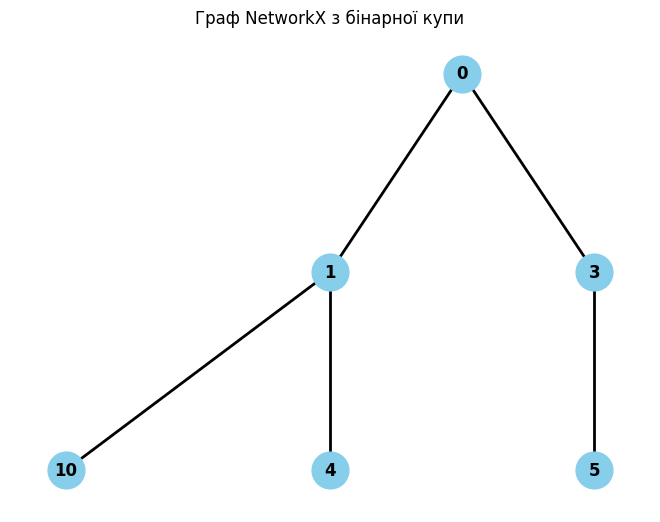

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def create_heap(arr):
    heap = []
    for value in arr:
        heapq.heappush(heap, value)
    return heap

def create_tree(heap):
    G = nx.Graph()
    for value in heap:
        G.add_node(value)
    for i, value in enumerate(heap):
        left_child_idx = 2 * i + 1
        right_child_idx = 2 * i + 2
        if left_child_idx < len(heap):
            G.add_edge(value, heap[left_child_idx])
        if right_child_idx < len(heap):
            G.add_edge(value, heap[right_child_idx])
    return G

# Створення бінарної купи
arr = [0, 4, 5, 10, 1, 3]
heap = create_heap(arr)

# Створення графу NetworkX на основі бінарної купи
G = create_tree(heap)

# Візуалізація графу
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold", width=2)
plt.title("Граф NetworkX з бінарної купи")
plt.show()
